# **Generating the parameters**
For fractional riccati equations, the key point for solving this fractional Riccati equation $(\varXi_{\lambda,\mu,\nu}^{u,v})$ is to set up the formal solutions as *fractional power series expansion* and then give the proof that the convergence radius of that expansions is nonzero.\\
Denote $R_{\psi}$ as the convergence radius, the fractional power series can be written as: 
\begin{equation}
    \psi(t) = \psi_{\lambda,\mu, \nu}(t) := \sum_{k \ge 0}a_{k}t^{k\alpha},
\end{equation}
where the coefficient $a_k$, k$\ge$1 are complex numbers. For $0<t<R_{\psi}$, by identification of the fractional derivative of power functions and the formula of Riccati Equation, we get the squence $a_k$ satisfies the \emph{discrete time convolution equation}:
\begin{equation}
    (A_{\lambda, \mu,\nu}) := a_{k+1} = (\lambda a_k^{*2})\frac{\Gamma(\alpha k + 1)}{\Gamma(\alpha k +\alpha + 1)},  k \ge 1,  a_1 = \frac{\nu}{\Gamma(\alpha+1)},  a_0=0
\end{equation}

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

# generate random data using monte carlo sampling

lambda_1 = np.random.uniform(0.0001,0.001,)  #generate data in matrix[:,200]
mu = np.random.uniform(-10,-8,)
nu = np.random.uniform(-3,-1,)

alpha = np.random.uniform(0,1,)


r_max = 50

def return_all_the_coefficients():  
  # return the list of coefficients up to a_k

  coefficients = np.empty((r_max+1,))

  a0 = 0
  a1 = nu/math.gamma(alpha+1)   
  #equation(3.1.19) in ref[1]
  coefficients[0] = a0
  coefficients[1] = a1

  def second_order_coefficients_convol(list_of_coefficients,k): 
    #return a^*2_k given the first k-1 coefficients
    if k==1:
      return 0
    else:
      sum2 = 0
      for l in range(1,k):
        a_l = list_of_coefficients[l]
        a_k_l = list_of_coefficients[k-l]
        sum2 += a_l*a_k_l   
        # equation(3.1.20) in ref[1]
      return sum2

  def second_order_coefficients(list_of_coefficients,n): 
    #return the coefficient a_n given the discrete time convolution equation
    k = n-1
    a_k_star_quadratic = second_order_coefficients_convol(list_of_coefficients,k)
    a_k = list_of_coefficients[k]
    a_n = (lambda_1*a_k_star_quadratic + mu*a_k)*math.gamma(alpha*k + 1)/math.gamma(alpha*k + alpha + 1)
    # equation (3.1.19) in ref[1]
    return a_n

  for i in range(2,r_max+1):
    coefficients[i] = second_order_coefficients(coefficients,i)

  return coefficients

In [ ]:
 coeff=return_all_the_coefficients()
 coeff

array([ 0.00000000e+00, -2.70872494e+00,  1.56138858e+01, -6.31942713e+01,
        1.98579737e+02, -5.12314871e+02,  1.12438990e+03, -2.15144547e+03,
        3.65358491e+03, -5.58033133e+03,  7.74176312e+03, -9.82231291e+03,
        1.14349211e+04, -1.21939830e+04,  1.17782984e+04, -9.96359718e+03,
        6.62234794e+03, -1.70584478e+03, -4.76865023e+03,  1.27072193e+04,
       -2.18993062e+04,  3.19572055e+04, -4.22540054e+04,  5.18817973e+04,
       -5.96478028e+04,  6.41177540e+04, -6.37070161e+04,  5.68134479e+04,
       -4.19830977e+04,  1.80999481e+04,  1.54077974e+04, -5.83521767e+04,
        1.09570475e+05, -1.66726223e+05,  2.26149534e+05, -2.82748269e+05,
        3.30027639e+05, -3.60257799e+05,  3.64825583e+05, -3.34797219e+05,
        2.61704092e+05, -1.38543939e+05, -3.90338971e+04,  2.71417693e+05,
       -5.53685339e+05,  8.74338585e+05, -1.21426962e+06,  1.54613713e+06,
       -1.83434842e+06,  2.03585071e+06, -2.10192337e+06])

In [ ]:
coef_df = pd.DataFrame(coeff)
coef_df = coef_df.rename(columns={0:"val"})
coef_df.shape[1]
coef_df

,val
0,0.000000e+00
1,-2.708725e+00
2,1.561389e+01
3,-6.319427e+01
4,1.985797e+02
5,-5.123149e+02
6,1.124390e+03
7,-2.151445e+03
8,3.653585e+03
9,-5.580331e+03


In [ ]:
t1 = np.arange(0,1,0.01)
alpha = np.arange(0,1,0.01)

def sol_psi(t1,alpha):
  sol_psi = 0
  for k in range(0,50):
    sol_psi += coeff[k]*pow(t1,alpha*k)

  return sol_psi



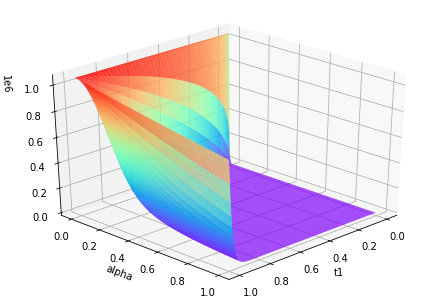

Running time: 5.04662823677063 Seconds


In [ ]:
import time
start = time.time()
t1=np.arange(0,1,0.005)
alpha = np.arange(0,1,0.005)

fig = plt.figure()
ax = Axes3D(fig)
t1,alpha = np.meshgrid(t1,alpha)
plt.xlabel("t1")
plt.ylabel("alpha")
z = sol_psi(t1,alpha)
ax.plot_surface(t1,alpha,z,rstride=1,cstride=1,cmap='rainbow')
ax.view_init(elev=None,azim=45)
plt.show()

end = time.time()
print('Running time: %s Seconds'%(end-start))

In [ ]:
alpha=0.5
t=1/500

psi_t = 0
for k in range(1,r_max+1):
  psi_t += np.dot(coeff,pow(t,k*alpha))
   
psi_t

array([ 0.00000000e+00, -1.26808930e-01,  7.30963900e-01, -2.95843915e+00,
        9.29650830e+00, -2.39840153e+01,  5.26383013e+01, -1.00719897e+02,
        1.71042539e+02, -2.61243153e+02,  3.62430559e+02, -4.59831476e+02,
        5.35325711e+02, -5.70861188e+02,  5.51400914e+02, -4.66445698e+02,
        3.10025149e+02, -7.98591055e+01, -2.23244311e+02,  5.94888341e+02,
       -1.02521579e+03,  1.49607624e+03, -1.97812082e+03,  2.42884580e+03,
       -2.79241126e+03,  3.00167198e+03, -2.98244329e+03,  2.65972097e+03,
       -1.96543828e+03,  8.47348881e+02,  7.21315874e+02, -2.73175654e+03,
        5.12954062e+03, -7.80528637e+03,  1.05871880e+04, -1.32368573e+04,
        1.54502405e+04, -1.68654651e+04,  1.70793058e+04, -1.56735283e+04,
        1.22516743e+04, -6.48593307e+03, -1.82737148e+03,  1.27064164e+04,
       -2.59207733e+04,  4.09321517e+04, -5.68460195e+04,  7.23823936e+04,
       -8.58750021e+04,  9.53083297e+04, -9.84015208e+04])

In [ ]:
coeff_trans = coeff.reshape(-1,1)
psi_t_trans = psi_t.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(coeff_trans, psi_t_trans, test_size=0.25, train_size=0.75)

# normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x_train_scaled = min_max_scaler.fit_transform(x_train)
y_train_scaled = min_max_scaler.fit_transform(y_train)
x_test_scaled = min_max_scaler.fit_transform(x_test)
y_test_scaled = min_max_scaler.fit_transform(y_test)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense
keras.backend.set_floatx('float64')


#create a neural network in the framework:
# input: coeff    output: psi_t    activation function: relu
# 4 hidden layers   32 neurons on each hidden layer  

model = Sequential()
model.add(Dense(32, activation="relu", input_dim =1))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,"linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
start = time.time()

model.compile(loss="mse", optimizer="sgd")           
history = model.fit(x_train_scaled, y_train_scaled, batch_size=16, validation_data = (x_test_scaled,
y_test_scaled),epochs =300, verbose ='auto', shuffle = True)  

end = time.time()
print('Running time: %s Seconds'%(end-start))

Epoch 1/300
3/3 [==============================] - 1s 80ms/step - loss: 0.2416 - val_loss: 0.2843
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 0.1868 - val_loss: 0.2344
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 0.1485 - val_loss: 0.1991
Epoch 4/300
3/3 [==============================] - 0s 14ms/step - loss: 0.1205 - val_loss: 0.1686
Epoch 5/300
3/3 [==============================] - 0s 14ms/step - loss: 0.0980 - val_loss: 0.1471
Epoch 6/300
3/3 [==============================] - 0s 15ms/step - loss: 0.0814 - val_loss: 0.1282
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 0.0675 - val_loss: 0.1137
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 0.0572 - val_loss: 0.1014
Epoch 9/300
3/3 [==============================] - 0s 13ms/step - loss: 0.0486 - val_loss: 0.0912
Epoch 10/300
3/3 [==============================] - 0s 13ms/step - loss: 0.0418 - val_loss: 0.0833
Epoch 11/300
3/3 [=

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


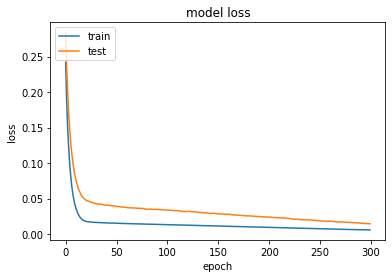

In [ ]:
# the loss curve when batch size is 16

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

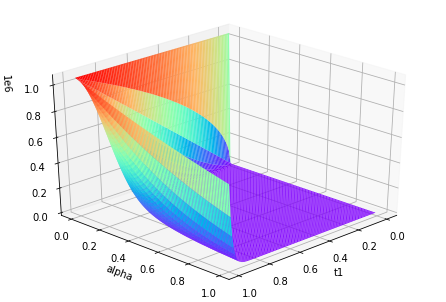

Running time: 1.3613345623016357 Seconds


In [ ]:
import time
start = time.time()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = Axes3D(fig)
t1,alpha = np.meshgrid(t1,alpha)
plt.xlabel("t1")
plt.ylabel("alpha")
z = sol_psi(t1,alpha)
ax.plot_surface(t1,alpha,z,rstride=1,cstride=1,cmap='rainbow')
ax.view_init(elev=None,azim=45)
plt.show()

end = time.time()
print('Running time: %s Seconds'%(end-start))